# Feature Engineering

following the data analysis carried out in the previous module, here are the following steps for feature engineering 
- One-Hot encode the variable "Geography"
- Label-Encode the variable "Gender"
- Apply log transformation on the Age variable feature
- Create a binary feature from the column Balance and drop the column Balance
- We will also apply SMOTE technique to tackle the data imbalance
- Scale the input features using MinMax scaler


In [58]:
# importing necessary module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.transformation import LogTransformer
from sklearn.preprocessing import Binarizer, MinMaxScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.selection import DropFeatures
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold



from sklearn.metrics import accuracy_score, recall_score , precision_score, confusion_matrix

import warnings

warnings.filterwarnings('ignore')

In [31]:
# loading up the dataset
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
# split data into feature and target
X = data.drop('Exited', axis=1)
y = data['Exited']

print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (10000, 13)
y shape:  (10000,)


In [33]:
# Split data into train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

print("X_train shape:", X_train.shape)
print("y_test shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape: (7500, 13)
y_test shape:  (7500,)
X_test shape:  (2500, 13)
y_test shape:  (2500,)


**Drop Unwanted Columns**

In [34]:
# drop surname, CustomerId, and RowNumber
drop_col = DropFeatures(features_to_drop=['Surname', 'CustomerId', 'RowNumber'])
drop_col.fit(X_train)
X_train = drop_col.transform(X_train)
X_test = drop_col.transform(X_test)
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9414,544,Spain,Female,53,9,0.00,1,1,0,125692.07
3363,747,Germany,Male,38,2,129728.60,1,1,0,89289.54
2979,642,France,Male,40,1,154863.15,1,1,1,138052.51
578,593,France,Female,41,6,0.00,1,1,0,65170.66
7984,464,France,Male,46,6,161798.53,1,1,0,182944.47


**Label Encode the Gender Variable**

In [35]:
label_encoder = OrdinalEncoder(variables=['Gender'])
label_encoder.fit(X_train, y_train)
X_train = label_encoder.transform(X_train)
X_test = label_encoder.transform(X_test)
print(label_encoder.encoder_dict_)
X_train.head()

{'Gender': {'Male': 0, 'Female': 1}}


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9414,544,Spain,1,53,9,0.00,1,1,0,125692.07
3363,747,Germany,0,38,2,129728.60,1,1,0,89289.54
2979,642,France,0,40,1,154863.15,1,1,1,138052.51
578,593,France,1,41,6,0.00,1,1,0,65170.66
7984,464,France,0,46,6,161798.53,1,1,0,182944.47


**One Hot Encode the Geography variable**

In [36]:
ohe_encoder = OneHotEncoder(variables=['Geography'])
ohe_encoder.fit(X_train)
X_train = ohe_encoder.transform(X_train)
X_test = ohe_encoder.transform(X_test)
print(ohe_encoder.encoder_dict_)
X_train.head()

{'Geography': ['Spain', 'Germany', 'France']}


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Spain,Geography_Germany,Geography_France
9414,544,1,53,9,0.00,1,1,0,125692.07,1,0,0
3363,747,0,38,2,129728.60,1,1,0,89289.54,0,1,0
2979,642,0,40,1,154863.15,1,1,1,138052.51,0,0,1
578,593,1,41,6,0.00,1,1,0,65170.66,0,0,1
7984,464,0,46,6,161798.53,1,1,0,182944.47,0,0,1


**apply log transformation on the Age column**

In [37]:
log_tranformer = LogTransformer(variables=['Age'])
log_tranformer.fit(X_train)
X_train = log_tranformer.transform(X_train)
X_test = log_tranformer.transform(X_test)
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Spain,Geography_Germany,Geography_France
9414,544,1,3.970292,9,0.00,1,1,0,125692.07,1,0,0
3363,747,0,3.637586,2,129728.60,1,1,0,89289.54,0,1,0
2979,642,0,3.688879,1,154863.15,1,1,1,138052.51,0,0,1
578,593,1,3.713572,6,0.00,1,1,0,65170.66,0,0,1
7984,464,0,3.828641,6,161798.53,1,1,0,182944.47,0,0,1


**Binarize the Balance column**

In [38]:
binarizer = SklearnTransformerWrapper(Binarizer(threshold=0), variables=['Balance'])
binarizer.fit(X_train)
X_train = binarizer.transform(X_train)
X_test = binarizer.transform(X_test)

**Scale the input features**

In [39]:
# lastly we scale the input features
scaler  = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
features = scaler.get_feature_names_out()
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)


In [41]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Spain,Geography_Germany,Geography_France
0,0.388,1.0,0.661952,0.9,0.0,0.0,1.0,0.0,0.628462,1.0,0.0,0.0
1,0.794,0.0,0.458016,0.2,1.0,0.0,1.0,0.0,0.446432,0.0,1.0,0.0
2,0.584,0.0,0.489457,0.1,1.0,0.0,1.0,1.0,0.690271,0.0,0.0,1.0
3,0.486,1.0,0.504592,0.6,0.0,0.0,1.0,0.0,0.325827,0.0,0.0,1.0
4,0.228,0.0,0.575126,0.6,1.0,0.0,1.0,0.0,0.914752,0.0,0.0,1.0


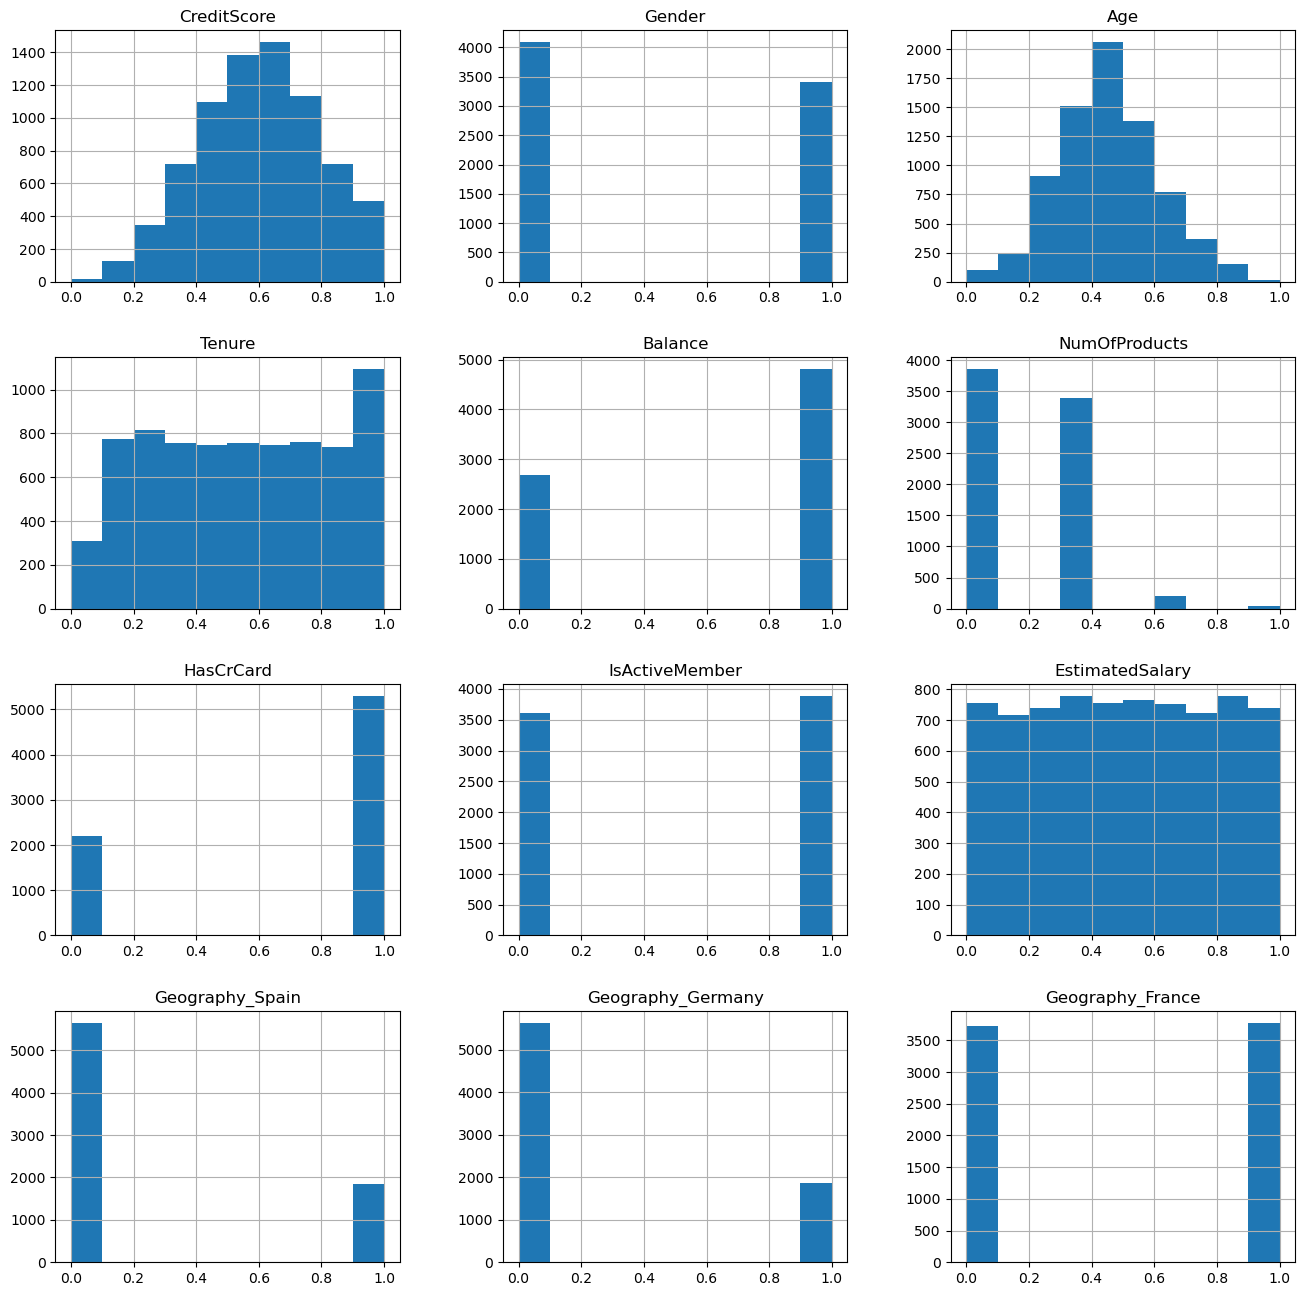

In [42]:
fig, ax = plt.subplots(figsize=(16,16))
X_train.hist(ax= ax)
plt.show()

From the above distribution graph, we can see that all features are on the same scale ranging from zero to one.

**Tackling Imbalance in the Dataset**

In [14]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [15]:
print("Distribution of churn before SMOTE: ", y_train.value_counts(normalize=True))
print("Distribution of churn after SMOTE: ", y_train_resampled.value_counts(normalize=True))


Distribution of churn before SMOTE:  Exited
0    0.796267
1    0.203733
Name: proportion, dtype: float64
Distribution of churn after SMOTE:  Exited
1    0.5
0    0.5
Name: proportion, dtype: float64


# Model Building 

I will be training up different model on both the unsampled training dataset and the resampled training dataset. The following classic machine learning models:
- Logistic Regression
- Random Forest Tree
- Gradient Boost
- SVM

we will also Use an artificial Neural network (ANN) algorithm to train our datasets

In [16]:
# Define a list of classifiers to use
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC()
]

# Define parameters for each classifier
param_grids = [
    {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]},
    {'max_depth': [3,4,5], 'n_estimators': [100,200,500], 'max_features': ['sqrt', 'log2', None]},
    {'max_depth': [3, 4, 5], 'min_samples_split': [2, 5, 10], 'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1]},
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 0.01, 0.1, 1]}
]

In [18]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
for i, clf in enumerate(classifiers):
    grid_search = GridSearchCV(clf, param_grid=param_grids[i], 
                               scoring='accuracy', cv=cv)
    print(f"Training on {clf}")
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameter for classifier{i}: {grid_search.best_params_}")
    print(f"Training accuracy for classifier {i}: {grid_search.score(X_train, y_train)}")
    print("=======================================================================")
    print()

Training on LogisticRegression()
Best parameter for classifier0: {'C': 10, 'penalty': 'l2'}
Training accuracy for classifier 0: 0.8153333333333334

Training on RandomForestClassifier()
Best parameter for classifier1: {'max_depth': 5, 'max_features': None, 'n_estimators': 100}
Training accuracy for classifier 1: 0.8628

Training on GradientBoostingClassifier()
Best parameter for classifier2: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
Training accuracy for classifier 2: 0.8718666666666667

Training on SVC()
Best parameter for classifier3: {'C': 1, 'gamma': 1, 'kernel': 'poly'}
Training accuracy for classifier 3: 0.8614666666666667



In [19]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
for i, clf in enumerate(classifiers):
    grid_search = GridSearchCV(clf, param_grid=param_grids[i], 
                               scoring='accuracy', cv=cv)
    print(f"Training on {clf}")
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameter for classifier{i}: {grid_search.best_params_}")
    print(f"Training accuracy for classifier {i}: {grid_search.score(X_train_resampled, y_train_resampled)}")
    print("=======================================================================")
    print()

Training on LogisticRegression()
Best parameter for classifier0: {'C': 10, 'penalty': 'l2'}
Training accuracy for classifier 0: 0.5906731413261889

Training on RandomForestClassifier()
Best parameter for classifier1: {'max_depth': 5, 'max_features': None, 'n_estimators': 100}
Training accuracy for classifier 1: 0.6998492967180174

Training on GradientBoostingClassifier()
Best parameter for classifier2: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
Training accuracy for classifier 2: 0.7227896851975888

Training on SVC()
Best parameter for classifier3: {'C': 1, 'gamma': 1, 'kernel': 'poly'}
Training accuracy for classifier 3: 0.681932350971199



In [20]:
base_accuracy = y_train.value_counts(normalize=True).values.max()

In [23]:
round(base_accuracy*100)

80

## Model Evaluation

In [25]:
logistic_reg = LogisticRegression(C=10, penalty='l2')
random_forest = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=None)
gradient_boost = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, min_samples_split=10)
svc = SVC(C=1, gamma=1, kernel='poly')

In [28]:
logistic_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boost.fit(X_train, y_train)
svc.fit(X_train, y_train)

SVC(C=1, gamma=1, kernel='poly')

In [ ]:
# Transforming X_test


In [43]:
y_pred_log = logistic_reg.predict(X_test)
y_pred_forest = random_forest.predict(X_test)
y_pred_grad = gradient_boost.predict(X_test)
y_pred_svc = svc.predict(X_test)

**Accuracy Scores**

In [44]:
acc_logistic_reg = accuracy_score(y_test, y_pred_log)
acc_random_forest = accuracy_score(y_test, y_pred_forest)
acc_gradient_boost = accuracy_score(y_test, y_pred_grad)
acc_svc = accuracy_score(y_test, y_pred_svc)

**Precision Scores**

In [45]:
precision_logistic_reg = precision_score(y_test, y_pred_log)
precision_random_forest = precision_score(y_test, y_pred_forest)
precision_gradient_boost = precision_score(y_test, y_pred_grad)
precision_svc = precision_score(y_test, y_pred_svc)

**Recall Scores**

In [46]:
recall_logistic_reg = recall_score(y_test, y_pred_log)
recall_random_forest = recall_score(y_test, y_pred_forest)
recall_gradient_boost = recall_score(y_test, y_pred_grad)
recall_svc = recall_score(y_test, y_pred_svc)

In [56]:
metrics_data = pd.DataFrame({"Accuracy": [acc_logistic_reg, acc_random_forest, acc_gradient_boost, acc_svc],
                            "Precision": [precision_logistic_reg, precision_random_forest, precision_gradient_boost, precision_svc],
                            "Recall": [recall_logistic_reg, recall_random_forest, recall_gradient_boost, recall_svc]})

metrics_data.index = ['Logistic_Regression', 'Random_Forest', 'Gradient_Boost', 'Support_Vector']
metrics_data

,Accuracy,Precision,Recall
Logistic_Regression,0.8136,0.614973,0.225933
Random_Forest,0.8484,0.721088,0.416503
Gradient_Boost,0.8536,0.745704,0.426326
Support_Vector,0.8504,0.797357,0.355599


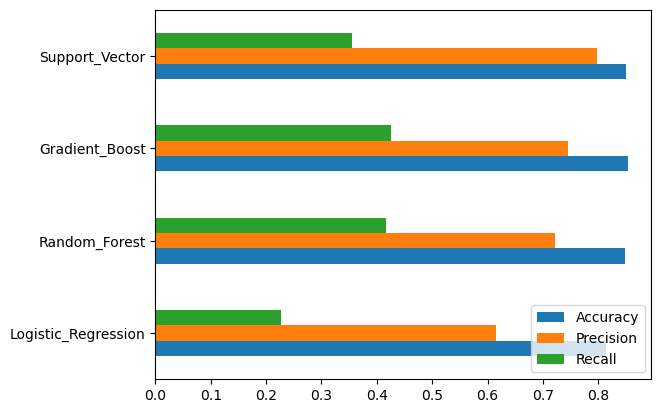

In [57]:
metrics_data.plot.barh()
plt.show()

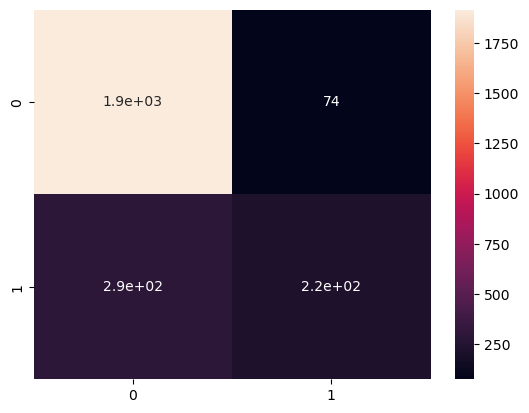

In [59]:
# Getting the cnfusion Matrics for Gradient Boost
conf_matrix = confusion_matrix(y_test, y_pred_grad)
sns.heatmap(conf_matrix, annot=True)
plt.show()

In [60]:
y_test.shape

(2500,)

In [61]:
y_test.value_counts()

Exited
0    1991
1     509
Name: count, dtype: int64

### Evaluating Resampled Dataset

In [62]:
logistic_reg = LogisticRegression(C=10, penalty='l2')
random_forest = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=None)
gradient_boost = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, min_samples_split=10)
svc = SVC(C=1, gamma=1, kernel='poly')

In [63]:
logistic_reg.fit(X_train_resampled, y_train_resampled)
random_forest.fit(X_train_resampled, y_train_resampled)
gradient_boost.fit(X_train_resampled, y_train_resampled)
svc.fit(X_train_resampled, y_train_resampled)

SVC(C=1, gamma=1, kernel='poly')

In [64]:
y_pred_log = logistic_reg.predict(X_test)
y_pred_forest = random_forest.predict(X_test)
y_pred_grad = gradient_boost.predict(X_test)
y_pred_svc = svc.predict(X_test)

In [65]:
acc_logistic_reg = accuracy_score(y_test, y_pred_log)
acc_random_forest = accuracy_score(y_test, y_pred_forest)
acc_gradient_boost = accuracy_score(y_test, y_pred_grad)
acc_svc = accuracy_score(y_test, y_pred_svc)

In [66]:
precision_logistic_reg = precision_score(y_test, y_pred_log)
precision_random_forest = precision_score(y_test, y_pred_forest)
precision_gradient_boost = precision_score(y_test, y_pred_grad)
precision_svc = precision_score(y_test, y_pred_svc)

In [67]:
recall_logistic_reg = recall_score(y_test, y_pred_log)
recall_random_forest = recall_score(y_test, y_pred_forest)
recall_gradient_boost = recall_score(y_test, y_pred_grad)
recall_svc = recall_score(y_test, y_pred_svc)

In [68]:
metrics_data = pd.DataFrame({"Accuracy": [acc_logistic_reg, acc_random_forest, acc_gradient_boost, acc_svc],
                            "Precision": [precision_logistic_reg, precision_random_forest, precision_gradient_boost, precision_svc],
                            "Recall": [recall_logistic_reg, recall_random_forest, recall_gradient_boost, recall_svc]})

metrics_data.index = ['Logistic_Regression', 'Random_Forest', 'Gradient_Boost', 'Support_Vector']
metrics_data

,Accuracy,Precision,Recall
Logistic_Regression,0.7048,0.380853,0.719057
Random_Forest,0.8196,0.553903,0.585462
Gradient_Boost,0.8316,0.581181,0.618861
Support_Vector,0.7672,0.453972,0.707269


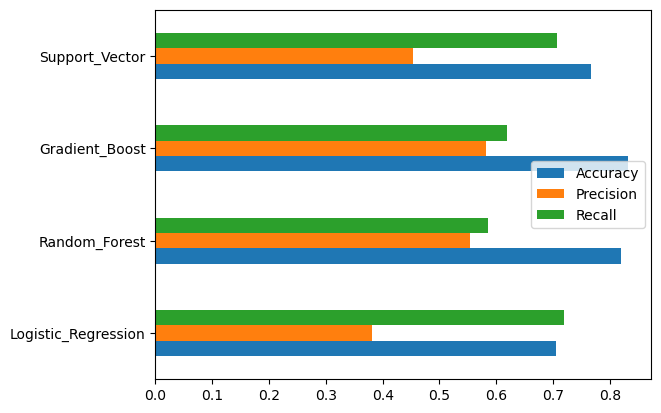

In [73]:
metrics_data.plot.barh()
plt.show()

In [71]:
train_pred = gradient_boost.predict(X_train)


In [72]:
print("---------Gradient Boost Metrics-----------")
print()
print("Accuracy Score: ", round(accuracy_score(y_train, train_pred),2))
print()
print("Precision Score: ", round(precision_score(y_train, train_pred),2))
print()
print("Recall Score: ", round(recall_score(y_train, train_pred),2))

---------Gradient Boost Metrics-----------

Accuracy Score:  0.84

Precision Score:  0.61

Recall Score:  0.67


In [74]:
!git add .